# Image processing and Principal Component Analysis

In [18]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
import sklearn

from pandas import Series
from pandas import DataFrame
from typing import Tuple

from tqdm import tnrange#, tqdm_notebook
from plotnine import *

from sklearn.decomposition import PCA

# Local imports
from common import *
from convenience import *

## I. Image sampling and processing functions

### Luminocity based grayscale conversion

In [2]:
def convert_to_grayscale(image: np.array)-> np.array:
    """Converts RGB image to grayscale image preserving perceived luminocity""" 
    return 0.299 * image[:,:,0] + 0.587 * image[:,:,1] + 0.114 * image[:,:,2]

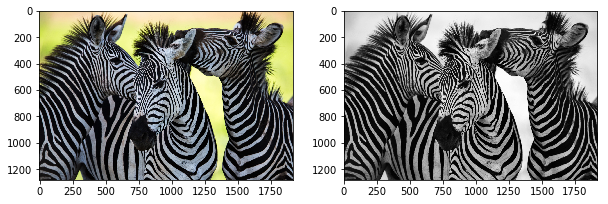

In [17]:
image = plt.imread('data/zebras.png')

#image = image[:512,:512, :]
gimage = convert_to_grayscale(image)


fig=plt.figure(figsize=(10,10))
fig.add_subplot(1, 2, 1)
plt.imshow(image)
fig.add_subplot(1, 2, 2)
plt.imshow(gimage, cmap ='gray')

## II. Crash course to sklearn.decomposition.PCA

In [47]:
X = DataFrame(np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]]), columns=['x1', 'x2'])
display(X)
pca = PCA(n_components=2)
pca.fit(X)
None

,x1,x2
0,-1,-1
1,-2,-1
2,-3,-2
3,1,1
4,2,1
5,3,2


Main attributes of PCA analysis result.

In [66]:
W = DataFrame(pca.components_, columns = ['x1', 'x2'], index = ['PCA1', 'PCA2'])
Lambda = DataFrame(pca.singular_values_, columns=['lambda'], index = ['PCA1', 'PCA2'])
cum_var = DataFrame(pca.explained_variance_, columns = ['CumVar'], index = ['PCA1', 'PCA2'])
rel_cum_var = DataFrame(100*pca.explained_variance_ratio_, columns = ['CumVar'], index = ['PCA1', 'PCA2'])
mu = DataFrame(pca.mean_, index = ['x1', 'x2']).T
mdisplay([Lambda.reset_index(),W.reset_index(), mu, cum_var.reset_index(), rel_cum_var.reset_index(), ], 
         ['Loadings', 'Rotation matrix', 'Center of gravity', 'Explained absolute variance', 'Explained relative variance'])

Loadings Rotation matrix Center of gravity Explained absolute variance Explained relative variance 
 
 
 index 
 lambda 
 
 
 
 
 PCA1 
 6.300612 
 
 
 PCA2 
 0.549804 
 
 
 
 
 
 index 
 x1 
 x2 
 
 
 
 
 PCA1 
 -0.838492 
 -0.544914 
 
 
 PCA2 
 0.544914 
 -0.838492 
 
 
 
 
 
 x1 
 x2 
 
 
 
 
 0.0 
 0.0 
 
 
 
 
 
 index 
 CumVar 
 
 
 
 
 PCA1 
 7.939543 
 
 
 PCA2 
 0.060457 
 
 
 
 
 
 index 
 CumVar 
 
 
 
 
 PCA1 
 99.244289 
 
 
 PCA2 
 0.755711

Transformations

In [79]:
display(DataFrame(pca.transform(X), columns = [r'$\xi_1$', r'$\xi_2$']))
display(DataFrame(pca.inverse_transform(pca.transform(X)), columns = ['x1', 'x2']))
display(DataFrame(pca.inverse_transform(DataFrame(pca.transform(X), columns =['xi1', 'xi2']).assign(xi2=0)), columns = ['x1', 'x2']))

,$\xi_1$,$\xi_2$
0,1.383406,0.293579
1,2.221898,-0.251335
2,3.605304,0.042244
3,-1.383406,-0.293579
4,-2.221898,0.251335
5,-3.605304,-0.042244


,x1,x2
0,-1.0,-1.0
1,-2.0,-1.0
2,-3.0,-2.0
3,1.0,1.0
4,2.0,1.0
5,3.0,2.0


,x1,x2
0,-1.159975,-0.753837
1,-1.863044,-1.210742
2,-3.023019,-1.964579
3,1.159975,0.753837
4,1.863044,1.210742
5,3.023019,1.964579


### II. PCA and colorspace compression

### III. PCA and texture compression

,x1,x2
0,-1,-1
1,-2,-1
2,-3,-2
3,1,1
4,2,1
5,3,2


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

array([6.30061232, 0.54980396])

,x1,x2
PCA1,-0.838492,-0.544914
PCA2,0.544914,-0.838492


In [ ]:

display(pca.components_)
